In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import binary_accuracy
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

### Load Pre-trained Model

In [2]:
best_model = load_model(r'model/best_model.h5')
#best_model = load_model(r'model\best_model2.h5')

In [3]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 25)           2700      
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 12002     
Total params: 14,702
Trainable params: 14,702
Non-trainable params: 0
_________________________________________________________________


### Load Test Dataset

In [4]:
import os
num_stock = len(os.listdir('testData'))-1

In [5]:
for i in range(0, num_stock):
    filepath = 'testData\\s' + str(i) + '.csv'
    stock = pd.read_csv(filepath)
    stock = stock.drop([stock.columns[0]],axis=1)
    stock_test = stock.to_numpy()
    stock_test = stock_test.reshape(stock_test.shape[0],stock_test.shape[1],1)
    
    y_pred = best_model.predict(stock_test)
    y_result = []
    y_prob_iter = []
    for idx,val in enumerate(y_pred):
        y_prob_iter.append(val[1])
        y_result.append([np.argmax(val)])
        
    iter_predict = pd.DataFrame(y_result[:-1])
    y_prob_iter = pd.DataFrame(y_prob_iter[:-1])
    
    s_name = 'Stock' + str(i)
    iter_predict = iter_predict.rename({0:s_name}, axis= 'columns')
    y_prob_iter = y_prob_iter.rename({0:s_name}, axis= 'columns')  
    if i == 0:
        y_predict = iter_predict
        y_prob = y_prob_iter
    else :
        y_predict = pd.concat([y_predict, iter_predict], axis = 1)
        y_prob = pd.concat([y_prob, y_prob_iter], axis = 1)                   

In [6]:
y_prob

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock483,Stock484,Stock485,Stock486,Stock487,Stock488,Stock489,Stock490,Stock491,Stock492
0,0.471097,0.991917,0.999371,0.653830,0.985074,0.999641,0.949493,0.999652,0.465914,0.859844,...,0.999630,0.999901,0.015098,0.997959,0.987253,0.950217,0.754339,0.887814,0.999813,0.898710
1,0.269521,0.743064,0.023217,0.995349,0.994769,0.736190,0.999801,0.038693,0.145883,0.857345,...,0.991869,0.024929,0.997097,0.207079,0.305732,0.530864,0.280257,0.569067,0.008584,0.401927
2,0.995782,0.756784,0.998692,0.009859,0.049497,0.403807,0.996368,0.996003,0.046343,0.995142,...,0.965654,0.700882,0.997490,0.381937,0.131583,0.984885,0.020753,0.997906,0.403336,0.994847
3,0.392513,0.991867,0.976696,0.989687,0.111673,0.188854,0.540328,0.932975,0.999305,0.031676,...,0.821465,0.995754,0.989372,0.270673,0.996539,0.009655,0.111052,0.294817,0.984662,0.938616
4,0.231258,0.708913,0.032169,0.157556,0.996830,0.987681,0.825318,0.098580,0.425393,0.998025,...,0.941872,0.998906,0.989497,0.927687,0.773301,0.260731,0.967791,0.240351,0.549111,0.636603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.998408,0.992492,0.999380,0.796990,0.989092,0.874458,0.220695,0.078474,0.998959,0.994437,...,0.024120,0.999325,0.997980,0.299637,0.995416,0.995313,0.998219,0.679098,0.998065,0.998667
225,0.996012,0.997402,0.200243,0.993315,0.994605,0.539133,0.987388,0.981359,0.999324,0.974675,...,0.748453,0.025184,0.997899,0.978883,0.999473,0.994631,0.996903,0.999182,0.998837,0.189893
226,0.000270,0.994672,0.998271,0.993537,0.982229,0.999244,0.999558,0.999246,0.005137,0.015468,...,0.999216,0.988623,0.102989,0.999891,0.000163,0.996539,0.995705,0.401297,0.000007,0.999737
227,0.995848,0.997875,0.009128,0.998704,0.997095,0.948378,0.995372,0.970588,0.851732,0.998513,...,0.993694,0.996456,0.998180,0.979635,0.997820,0.995183,0.996109,0.979903,0.997745,0.016563


In [7]:
y_predict

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock483,Stock484,Stock485,Stock486,Stock487,Stock488,Stock489,Stock490,Stock491,Stock492
0,0,1,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,0,1,0,1,1,1,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,1,1,0,0,0,1,1,0,1,...,1,1,1,0,0,1,0,1,0,1
3,0,1,1,1,0,0,1,1,1,0,...,1,1,1,0,1,0,0,0,1,1
4,0,1,0,0,1,1,1,0,0,1,...,1,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1,1,1,1,1,1,0,0,1,1,...,0,1,1,0,1,1,1,1,1,1
225,1,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
226,0,1,1,1,1,1,1,1,0,0,...,1,1,0,1,0,1,1,0,0,1
227,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [8]:
y_true = pd.read_csv('testData/test_target_set.csv')

In [9]:
y_true = y_true['0']

In [10]:
new_y_true = pd.DataFrame(y_true[:229])

In [11]:
indx = [i for i in range(0,229)]
for i in range(1, num_stock):
    iter_y_true = pd.DataFrame(y_true[i*229: (i+1)*229])
    iter_y_true.index = indx
    new_y_true = pd.concat([new_y_true, iter_y_true], axis = 1)

In [12]:
new_y_true

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
225,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
226,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
227,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [13]:
y_t = new_y_true.to_numpy().flatten().tolist()
y_p = y_predict.to_numpy().flatten().tolist()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
confusion_matrix(y_t,y_p)

array([[41853, 14332],
       [13351, 43361]], dtype=int64)

In [15]:
precision_score(y_t,y_p)

0.7515816476868944

In [16]:
accuracy_score(y_t,y_p)

0.7547941929369248

In [17]:
y_prob

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock483,Stock484,Stock485,Stock486,Stock487,Stock488,Stock489,Stock490,Stock491,Stock492
0,0.471097,0.991917,0.999371,0.653830,0.985074,0.999641,0.949493,0.999652,0.465914,0.859844,...,0.999630,0.999901,0.015098,0.997959,0.987253,0.950217,0.754339,0.887814,0.999813,0.898710
1,0.269521,0.743064,0.023217,0.995349,0.994769,0.736190,0.999801,0.038693,0.145883,0.857345,...,0.991869,0.024929,0.997097,0.207079,0.305732,0.530864,0.280257,0.569067,0.008584,0.401927
2,0.995782,0.756784,0.998692,0.009859,0.049497,0.403807,0.996368,0.996003,0.046343,0.995142,...,0.965654,0.700882,0.997490,0.381937,0.131583,0.984885,0.020753,0.997906,0.403336,0.994847
3,0.392513,0.991867,0.976696,0.989687,0.111673,0.188854,0.540328,0.932975,0.999305,0.031676,...,0.821465,0.995754,0.989372,0.270673,0.996539,0.009655,0.111052,0.294817,0.984662,0.938616
4,0.231258,0.708913,0.032169,0.157556,0.996830,0.987681,0.825318,0.098580,0.425393,0.998025,...,0.941872,0.998906,0.989497,0.927687,0.773301,0.260731,0.967791,0.240351,0.549111,0.636603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.998408,0.992492,0.999380,0.796990,0.989092,0.874458,0.220695,0.078474,0.998959,0.994437,...,0.024120,0.999325,0.997980,0.299637,0.995416,0.995313,0.998219,0.679098,0.998065,0.998667
225,0.996012,0.997402,0.200243,0.993315,0.994605,0.539133,0.987388,0.981359,0.999324,0.974675,...,0.748453,0.025184,0.997899,0.978883,0.999473,0.994631,0.996903,0.999182,0.998837,0.189893
226,0.000270,0.994672,0.998271,0.993537,0.982229,0.999244,0.999558,0.999246,0.005137,0.015468,...,0.999216,0.988623,0.102989,0.999891,0.000163,0.996539,0.995705,0.401297,0.000007,0.999737
227,0.995848,0.997875,0.009128,0.998704,0.997095,0.948378,0.995372,0.970588,0.851732,0.998513,...,0.993694,0.996456,0.998180,0.979635,0.997820,0.995183,0.996109,0.979903,0.997745,0.016563


### Trading

In [18]:
change_value = pd.read_csv('changeData/change_value.csv')

In [19]:
change_value = change_value.set_index('Date')

In [20]:
change_value = change_value[-229:]

In [21]:
change_value

,Change0,Change1,Change2,Change3,Change4,Change5,Change6,Change7,Change8,Change9,...,Change483,Change484,Change485,Change486,Change487,Change488,Change489,Change490,Change491,Change492
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-24,0.0169,-0.0152,0.0174,-0.0029,0.0154,-0.0091,0.0045,-0.0028,0.0293,0.0337,...,0.0249,0.0762,-0.0032,-0.0006,0.0298,0.0209,0.0297,0.0331,0.0581,-0.0200
2020-11-25,0.0002,-0.0112,0.0023,-0.0070,-0.0027,0.0170,0.0159,0.0193,-0.0029,-0.0080,...,0.0021,-0.0230,-0.0004,0.0176,-0.0085,-0.0054,-0.0020,-0.0093,-0.0217,-0.0054
2020-11-27,-0.0013,0.0114,0.0066,0.0306,0.0032,0.0213,0.0148,0.0055,0.0035,0.0029,...,0.0005,0.0082,-0.0072,0.0142,0.0047,0.0053,0.0115,0.0023,-0.0364,0.0080
2020-11-30,-0.0235,0.0056,-0.0030,0.0081,-0.0041,0.0171,0.0030,0.0627,-0.0149,-0.0285,...,-0.0065,-0.0071,-0.0038,0.0586,-0.0120,-0.0129,0.0038,-0.0060,-0.0220,-0.0068
2020-12-01,-0.0128,0.0025,-0.0052,-0.0215,0.0128,0.0057,0.0014,-0.0003,0.0332,0.0078,...,0.0283,0.0185,0.0156,0.0017,0.0115,0.0051,-0.0165,-0.0203,0.0384,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-15,0.0090,-0.0007,0.0039,0.0183,0.0082,0.0038,0.0042,0.0012,0.0027,0.0054,...,-0.0050,-0.0101,0.0076,0.0081,0.0107,0.0013,0.0088,0.0050,-0.0080,0.0091
2021-10-18,-0.0012,-0.0057,-0.0174,-0.0009,0.0040,0.0000,0.0209,0.0384,0.0329,-0.0229,...,-0.0081,0.0010,-0.0190,0.0194,0.0032,0.0099,0.0215,-0.0095,0.0014,0.0025
2021-10-19,0.0032,0.0216,0.0002,-0.0047,0.0191,0.0102,0.0213,-0.0009,0.0073,0.0126,...,0.0131,0.0090,0.0039,-0.0009,0.0034,-0.0059,0.0032,0.0272,0.0164,0.0084


In [22]:
new_name = []
for i in range(num_stock):
    name = 'Stock' + str(i)
    new_name.append(name)

In [23]:
change_value.columns = new_name

In [24]:
change_value

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock483,Stock484,Stock485,Stock486,Stock487,Stock488,Stock489,Stock490,Stock491,Stock492
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-24,0.0169,-0.0152,0.0174,-0.0029,0.0154,-0.0091,0.0045,-0.0028,0.0293,0.0337,...,0.0249,0.0762,-0.0032,-0.0006,0.0298,0.0209,0.0297,0.0331,0.0581,-0.0200
2020-11-25,0.0002,-0.0112,0.0023,-0.0070,-0.0027,0.0170,0.0159,0.0193,-0.0029,-0.0080,...,0.0021,-0.0230,-0.0004,0.0176,-0.0085,-0.0054,-0.0020,-0.0093,-0.0217,-0.0054
2020-11-27,-0.0013,0.0114,0.0066,0.0306,0.0032,0.0213,0.0148,0.0055,0.0035,0.0029,...,0.0005,0.0082,-0.0072,0.0142,0.0047,0.0053,0.0115,0.0023,-0.0364,0.0080
2020-11-30,-0.0235,0.0056,-0.0030,0.0081,-0.0041,0.0171,0.0030,0.0627,-0.0149,-0.0285,...,-0.0065,-0.0071,-0.0038,0.0586,-0.0120,-0.0129,0.0038,-0.0060,-0.0220,-0.0068
2020-12-01,-0.0128,0.0025,-0.0052,-0.0215,0.0128,0.0057,0.0014,-0.0003,0.0332,0.0078,...,0.0283,0.0185,0.0156,0.0017,0.0115,0.0051,-0.0165,-0.0203,0.0384,0.0061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-15,0.0090,-0.0007,0.0039,0.0183,0.0082,0.0038,0.0042,0.0012,0.0027,0.0054,...,-0.0050,-0.0101,0.0076,0.0081,0.0107,0.0013,0.0088,0.0050,-0.0080,0.0091
2021-10-18,-0.0012,-0.0057,-0.0174,-0.0009,0.0040,0.0000,0.0209,0.0384,0.0329,-0.0229,...,-0.0081,0.0010,-0.0190,0.0194,0.0032,0.0099,0.0215,-0.0095,0.0014,0.0025
2021-10-19,0.0032,0.0216,0.0002,-0.0047,0.0191,0.0102,0.0213,-0.0009,0.0073,0.0126,...,0.0131,0.0090,0.0039,-0.0009,0.0034,-0.0059,0.0032,0.0272,0.0164,0.0084


In [25]:
# k개의 long과 short 로 trading!
trade_value = []
k = 5
for i in range (229):
    val = 0
    prob_iter = y_prob.iloc[i]
    change_iter = change_value.iloc[i]
    
    prob_sort = prob_iter.sort_values() 
    
    long_list = prob_sort.index[-k:]
    short_list = prob_sort.index[:k]
    long_val = []
    short_val = []
    for name1, name2 in zip(long_list,short_list):
        val += change_iter[name1]
        val -= change_iter[name2]
        long_val.append(change_iter[name1])
        short_val.append(change_iter[name2])
        
    trade_value.append(val)


In [26]:
np.average(trade_value)

0.0022703056768558954

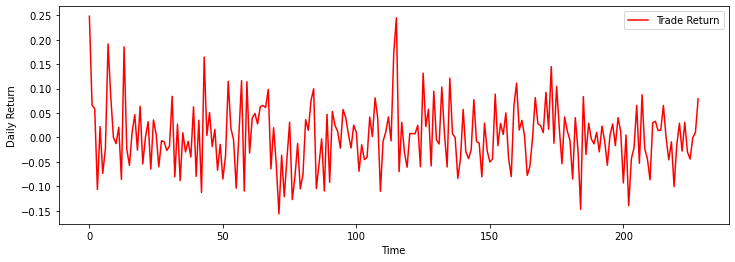

In [27]:
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(trade_value, 'r-')
plt.legend(['Trade Return'])
plt.xlabel('Time')
plt.ylabel('Daily Return')
plt.show()